#### Load and Pre-process the CIFAR-10 Dataset

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")

# load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the image to range from 0 to 1
X_train = X_train/255.0
X_test = X_test/255.0

# Reshape the data to fit the model(28*28 pixels , 1 color channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# convert class vectors to binary class metrics
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#### Building and Compiling the Neural Network
>- Creating a Convolution Neural Network(CNN)

>- Setting up the Model with an optimizer(how the model learns), a loss function(how the model's performance is measured) and metrics (how we evaluate the model's performance).


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

def build_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3), activation = 'relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation="relu"))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

    return model

model = build_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Training the Model.
>We feed the training data into the model, allowing it to learn from the images and their labels. We also validate the model's performance with test data during training to monitor its progress.

In [7]:
history = model.fit(X_train, y_train, epochs=6, batch_size=64 ,validation_split=0.2)

Epoch 1/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 69s 80ms/step - accuracy: 0.7650 - loss: 0.7199 - val_accuracy: 0.9785 - val_loss: 0.0716
Epoch 2/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 67s 60ms/step - accuracy: 0.9661 - loss: 0.1188 - val_accuracy: 0.9856 - val_loss: 0.0516
Epoch 3/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - accuracy: 0.9767 - loss: 0.0812 - val_accuracy: 0.9875 - val_loss: 0.0431
Epoch 4/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 91s 73ms/step - accuracy: 0.9816 - loss: 0.0651 - val_accuracy: 0.9878 - val_loss: 0.0419
Epoch 5/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 86s 78ms/step - accuracy: 0.9853 - loss: 0.0522 - val_accuracy: 0.9852 - val_loss: 0.0496
Epoch 6/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 66ms/step - accuracy: 0.9867 - loss: 0.0421 - val_accuracy: 0.9898 - val_loss: 0.0397


#### Evaluation of the Model
> We test the model with unseen data, to test  its accuracy and how well it performs with new data(new images).

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', (test_acc)*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9880 - loss: 0.0389
Test accuracy: 99.1100013256073


#### Visualizing the Results
>Plotting the training, Validation accuracy and loss to see how well the model has learned and to check if it's overfitting.

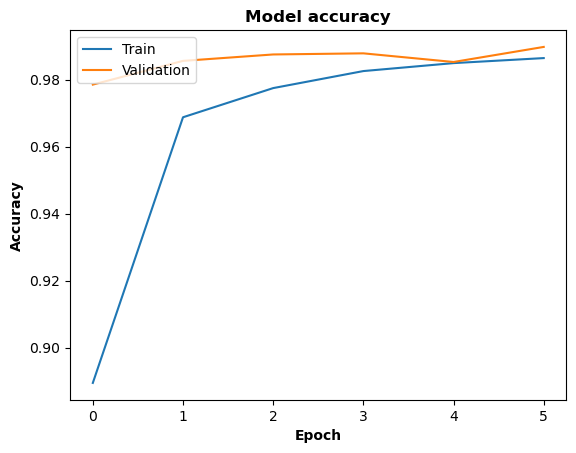

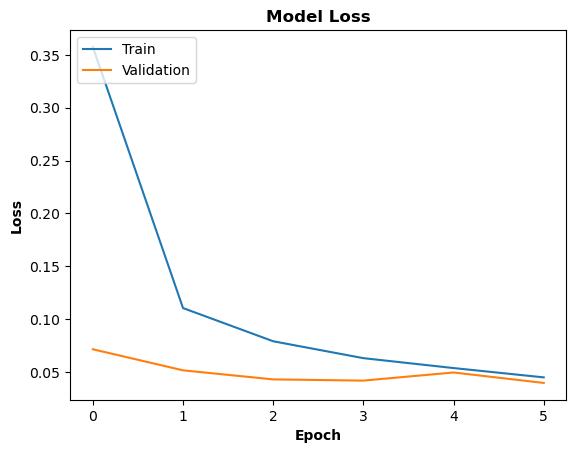

In [9]:
import matplotlib.pyplot as plt

# Training and Validation Accuracy Values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy', weight = 'bold')
plt.ylabel('Accuracy', weight = 'bold')
plt.xlabel('Epoch', weight = 'bold')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Training and Validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', weight = 'bold')
plt.ylabel('Loss', weight = 'bold')
plt.xlabel('Epoch', weight = 'bold')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
# Make Predictions on the test set
import numpy as np
predictions = model.predict(X_test)
predictions.argmax(axis=1)
true_classes = np.argmax(y_test, axis = 1)
true_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

- Accuracy Plot: Both training and validation accuracy are increasing and remain close, indicating that the model is learning well without overfitting.
- Loss Plot: Both training and validation losses are decreasing, with the training loss slightly higher but still closely following the validation loss, again suggesting a good learning process.

#### Saving the Model
>Done using the save method in Keras, which allows one to save the entire model architecture, weights, and optimizer state in a single file.

In [12]:
model.save("mnist_cnn_model.keras")